# Recommendation System

## Item-Based Collaborative Filtering

## Notebook by [WenyiXu](https://github.com/xuwenyihust)

### Loading the data

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

fulldf=pd.read_csv("https://raw.githubusercontent.com/xuwenyihust/Recommendation-Systems/master/data/bigdf.csv")

In [11]:
print(fulldf.head(5))
print(fulldf.shape)

                  user_id             business_id                 date  \
0  rLtl8ZkDX5vH5nAx9C3q5Q  9yKzy9PApeiPPOUJEtnvkg  2011-01-26 00:00:00   
1  SBbftLzfYYKItOMFwOTIJg  9yKzy9PApeiPPOUJEtnvkg  2008-05-04 00:00:00   
2  mlBC3pN9GXlUUfQi1qBBZA  9yKzy9PApeiPPOUJEtnvkg  2010-07-05 00:00:00   
3  0bNXP9quoJEgyVZu9ipGgQ  9yKzy9PApeiPPOUJEtnvkg  2012-10-10 00:00:00   
4  T7J9ae0wTskrI_Bgwp-4cA  9yKzy9PApeiPPOUJEtnvkg  2009-12-17 00:00:00   

                review_id  stars  usefulvotes_review user_name  \
0  fWKvX83p0-ka4JS3dc6E5A      5                   5     Jason   
1  DASdFe-g0BgfN9J2tanStg      5                   1  Jennifer   
2  W8CX2h_hmODWmgSJVbMifw      2                   1  Jennifer   
3  nYVQiPGeiwr7g5BSX7WDJg      3                   9    Aileen   
4  grZNCXAgd-OH8daA28R-2A      3                   1   Jasmine   

                          categories            biz_name   latitude  \
0  [Breakfast & Brunch, Restaurants]  Morning Glory Cafe  33.390792   
1  [Breakfast & 

### Brief Exploratory analysis

In [12]:
print(fulldf.shape)
print(fulldf['user_id'].unique().shape)
print(fulldf['business_id'].unique().shape)

(149319, 15)
(34789,)
(4503,)


We can see that the number of unique users are much larger than the number of unique items.

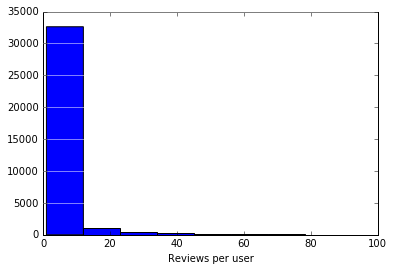

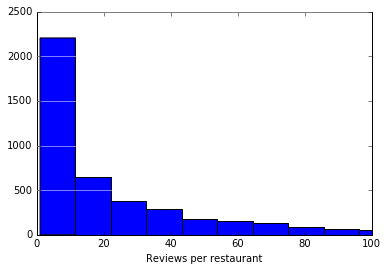

In [13]:
fig, ax = plt.subplots()
reviews_per_user=fulldf.groupby(['user_id'])['business_id'].count()
ax.set(xlim=(0,100), xlabel='Reviews per user')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.hist(reviews_per_user, bins=30, log=False, color="Blue")
plt.show()

fig, ax = plt.subplots()
reviews_per_item=fulldf.groupby(['business_id'])['user_id'].count()
ax.set(xlim=(0,100), xlabel='Reviews per restaurant')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.hist(reviews_per_item, bins=70, log=False, color="Blue")
plt.show()

The plots show that most users reviewed on less than 20 item. And most items have less than 20 reviews.

In this case, there will be very small number of co-rated items or even no such one between 2 users.

This may lead to a bad result.

### Reduce Sparsity

Reduce the sparsity of the data set, construct a new smalldf.

In [14]:
smalldf=fulldf[(fulldf.user_review_count > 60) & (fulldf.business_review_count > 150)]

### Re-analyze the Reduced Data

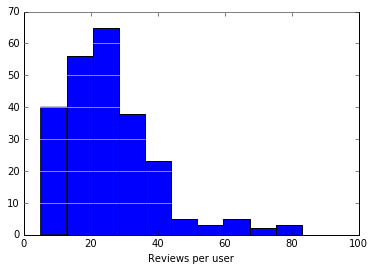

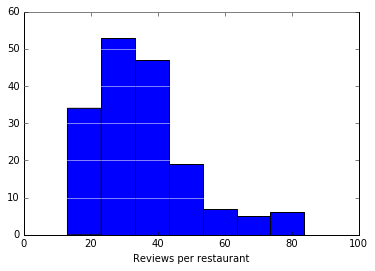

In [15]:
fig, ax = plt.subplots()
reviews_per_user=smalldf.groupby(['user_id'])['business_id'].count()
ax.set(xlim=(0,100), xlabel='Reviews per user')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.hist(reviews_per_user, bins=10, log=False, color="Blue")
plt.show()

fig, ax = plt.subplots()
reviews_per_item=smalldf.groupby(['business_id'])['user_id'].count()
ax.set(xlim=(0,100), xlabel='Reviews per restaurant')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.hist(reviews_per_item, bins=10, log=False, color="Blue")
plt.show()

Now it's better than the original dataset.

### Train/Test Split

Split the train & test dataset, use the train subset to train the model, and validate the model using test subset.

In [16]:
X = smalldf[['user_id', 'business_id', 'review_id', 'user_avg', 'business_avg']]
y = smalldf[['stars']]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train.head(5))
print(X_test.head(5))

(4932, 5) (4932, 1)
(1233, 5) (1233, 1)
                      user_id             business_id               review_id  \
13489  dQO0tQISZyb9L4d5ASnXyQ  cp39VURFby4A6u9m2It8jg  cAzfisNGbqh0SWCz8eJvxg   
80486  XBHJCDzNh--mBhJkzyM_iA  h6jfMpTZpNduLG0wE2tbaw  luPPybgUbV9zmFSHxRuv_Q   
4080   XqMkm-DD9VsdcKx2YVGhSA  s1dex3Z3QoqiK7V-zXUgAw  P8bbNJmogxR6fk9PFpOi_Q   
23816  NvDR3SPVPXrDB_dbKuGoWA  byhwHi0lhYdyY5kSpuqoaQ  dyJXDBwfCJnCqLNFR-fPUA   
9209   rO3WEI9L-_deUR9-JHuNQw  7_zL7NX_rDFwhbLp98PwZg  vq3G0Eh6vH1gZshGM52MnA   

       user_avg  business_avg  
13489  3.478261      3.662021  
80486  3.800000      4.042781  
4080   3.586538      4.030435  
23816  3.354610      3.605263  
9209   3.269841      2.934783  
                      user_id             business_id               review_id  \
10101  ZC49A1K-if7KP8VJXoqELQ  3n9mSKySEv3G03YjcU-YOQ  pHfhAyYOKldTxIHV6zsYJQ   
4413   waD2euOMPTnTzQ0thq3H6Q  c1yGkETheht_1vjda7G5sA  fDmXpS-0lmWmNPehY5nZDQ   
46865  eBwBjylS66qPcHs2_ajLag  8Hn5X1A

### Construct traindf & testdf

In [20]:
traindf = X_train
#traindf.loc[:,'stars'] = y_train
traindf['stars'] = y_train

testdf = X_test
#testdf.loc[:, 'stars'] = y_test
testdf['stars'] = y_test

print(traindf.head(2))
print('---------------------------------------')
print(testdf.head(2))
print('---------------------------------------')

                      user_id             business_id               review_id  \
13489  dQO0tQISZyb9L4d5ASnXyQ  cp39VURFby4A6u9m2It8jg  cAzfisNGbqh0SWCz8eJvxg   
80486  XBHJCDzNh--mBhJkzyM_iA  h6jfMpTZpNduLG0wE2tbaw  luPPybgUbV9zmFSHxRuv_Q   

       user_avg  business_avg  stars  
13489  3.478261      3.662021      3  
80486  3.800000      4.042781      2  
---------------------------------------
                      user_id             business_id               review_id  \
10101  ZC49A1K-if7KP8VJXoqELQ  3n9mSKySEv3G03YjcU-YOQ  pHfhAyYOKldTxIHV6zsYJQ   
4413   waD2euOMPTnTzQ0thq3H6Q  c1yGkETheht_1vjda7G5sA  fDmXpS-0lmWmNPehY5nZDQ   

       user_avg  business_avg  stars  
10101  3.945946      4.328804      4  
4413   3.627907      4.283814      5  
---------------------------------------


C:\Users\Wenyi Xu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Wenyi Xu\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Get item reviews

Given an item and a set of users, return the reviews of that item by these users.

In [17]:
def get_item_reviews(item_id, df, set_of_users):
    mask = (df['user_id'].isin(set_of_users)) & (df['business_id']==item_id)
    reviews = df[mask]
    reviews = reviews[reviews.user_id.duplicated()==False]
    return reviews

**Test**

In [21]:
print(get_item_reviews('h6jfMpTZpNduLG0wE2tbaw', traindf, ['XBHJCDzNh--mBhJkzyM_iA']))

                      user_id             business_id               review_id  \
80486  XBHJCDzNh--mBhJkzyM_iA  h6jfMpTZpNduLG0wE2tbaw  luPPybgUbV9zmFSHxRuv_Q   

       user_avg  business_avg  stars  
80486       3.8      4.042781      2  


### Common user support

For a pair of items, the number of users who have reviewd both.

This will be used to modify similarity between items.

**If the common user support is low, the similarity is less believable.**

In [22]:
def common_users(item0, item1, df):
    item0_users = df[df['business_id'] == item0]['user_id'].unique()
    item1_users = df[df['business_id'] == item1]['user_id'].unique()
    common_users = set(item0_users).intersection(set(item1_users))
    n_common = len(common_users)
    return (common_users, n_common)

**Test**

In [44]:
#print(common_users('cp39VURFby4A6u9m2It8jg', 'h6jfMpTZpNduLG0wE2tbaw', traindf))
print(common_users("z3yFuLVrmH-3RJruPEMYKw", "zruUQvFySeXyEd7_rQixBg", traindf))

({'n9Zg0jlOGtxfIrvoPm6Hhw', '3Jw-rYwJEz6jSqPgVVmmhA', 'Ovpa3S8xD96dLE5eDxcxJg', 'Cp-PV8rsypbO-xBrQ6KmQg', 'bX5mIrDlyD8ZabvF_An7FA'}, 5)


### Item-to-item Similarity

Use **Pearson correlation** coefficient to calculate the similarity.

To compute the item-to-item similarity, don't compare the items' whole reviews, but **just compare the reviews of both items by common users**.

In [30]:
def calculate_similarity(item0, item1, df):
    co_users = common_users(item0, item1, df)[0]
    n_common = common_users(item0, item1, df)[1]
    # Pick out the reviews by common users
    item0_reviews = get_item_reviews(item0, df, co_users)
    item1_reviews = get_item_reviews(item1, df, co_users)
    sim = pearsonr(item0_reviews['stars']-item0_reviews['user_avg'], item1_reviews['stars']-item1_reviews['user_avg'])[0]
    if np.isnan(sim):
        return 0
    else:
        return sim 

**Test**

In [31]:
print(calculate_similarity('cp39VURFby4A6u9m2It8jg', 'h6jfMpTZpNduLG0wE2tbaw', traindf))

0


### Create the item-to-item Similarity Database

### Database in python class 

In [48]:
class Database:
    "A class representing a database of similaries and common supports"
    
    def __init__(self, df):
        database={}
        self.df=df
        self.uniquebizids={v:k for (k,v) in enumerate(df['business_id'].unique())}
        keys=self.uniquebizids.keys()
        l_keys=len(keys)
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)
        
    def populate_by_calculating(self):
        """
        a populator for every pair of businesses in df. takes similarity_func like
        pearson_sim as argument
        """
        items=self.uniquebizids.items()
        for b1, i1 in items:
            for b2, i2 in items:
                if i1 < i2:
                    sim=calculate_similarity(b1, b2, self.df)
                    nsup=common_users(b1, b2, self.df)[1]
                    self.database_sim[i1][i2]=sim
                    self.database_sim[i2][i1]=sim
                    self.database_sup[i1][i2]=nsup
                    self.database_sup[i2][i1]=nsup
                elif i1==i2:
                    nsup=self.df[self.df.business_id==b1].user_id.count()
                    self.database_sim[i1][i1]=1.
                    self.database_sup[i1][i1]=nsup
                    

    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.uniquebizids[b1]][self.uniquebizids[b2]]
        nsup=self.database_sup[self.uniquebizids[b1]][self.uniquebizids[b2]]
        return (sim, nsup)

**Test**

In [49]:
db=Database(traindf)
db.populate_by_calculating()

C:\Users\Wenyi Xu\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [50]:
db.get("z3yFuLVrmH-3RJruPEMYKw", "zruUQvFySeXyEd7_rQixBg")

(0.35798500335648437, 5)

### Database in sqlite

In [2]:
conn = sqlite3.connect('similarity.db')
c = conn.cursor()

In [9]:
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS item2item(i REAL)')

In [7]:
def data_entry():
    c.execute('INSERT INTO item2item (col0, col1, col2, ...) VALUES(?, ?, ?, ...)',
             (var0, var1, var2, ...))
    conn.commit()
    c.close()
    conn.close()

In [10]:
create_table()
data_entry()